#### ¿A partir de los embeddings puedo predecir a que cluster pertenece?

APRENDIZAJE SUPERVISADO

In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
mainpath = '/Users/sarasotoandreu/Documents/TFG (nueva muestra)/datos_sin_balanceo.txt'
datos = pd.read_csv(mainpath)

### Preparamos los datos

In [3]:
#Cada elemento del vector es un str -> pasarlo a float
for empresa in range(len(datos)):
    lista = datos['v_embedding'][empresa]
    lista = lista.split(',')
    for i in range(len(lista)):
        elemento = lista[i]
        elemento = elemento.replace(' ', '')
        elemento = elemento.replace('[', '')
        elemento = elemento.replace(']', '')
        elemento = float(elemento)
        lista[i] = elemento
        
    datos['v_embedding'][empresa] = lista

/var/folders/vn/j5gw_yzn6fdchw9gvstsg_xr0000gn/T/ipykernel_37750/2547299696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['v_embedding'][empresa] = lista


In [4]:
X_vector = []
y_vector = []
for i in range(len(datos)):
    X_vector.append(datos['v_embedding'][i])
    y_vector.append(datos['etiqueta_cluster_competitividad'][i])

In [5]:
#LIBRERIAS NECESARIAS

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import AUC
from imblearn.over_sampling import SMOTE

2023-04-27 21:26:15.307534: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [7]:
lista_accuracy = []

# PREPARAR TRAIN Y TEST

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTE

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_vector, y_vector, test_size=0.2, random_state= 42)

In [10]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [11]:
print('Antes de aplicar SMOTE:', Counter(y_train))

Antes de aplicar SMOTE: Counter({0: 2737, 1: 227})


In [ ]:
#BALANCEO DE LOS DATOS

In [12]:
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [13]:
print('Después de aplicar SMOTE:', Counter(y_train))

Después de aplicar SMOTE: Counter({0: 2737, 1: 2737})


# 1 - REGRESIÓN LOGISTICA 

Puedes utilizar la regresión logística, que es un modelo de clasificación binaria o multiclase que es simple y rápido de implementar. Puedes utilizar la función LogisticRegression de la biblioteca scikit-learn en Python para ajustar un modelo de regresión logística a tus datos.

#### APLICAMOS EL MODELO

In [14]:
#PASO 1: Creamos el modelo
regresion_logistica = LogisticRegression()

#PASO 2: Entrenamos el modelo - conjunto de prueba
regresion_logistica.fit(X_train, y_train)

#PASO 3: Realizar predicciones - conjunto prueba
rl_prediccion = regresion_logistica.predict(X_test)

In [15]:
#PASO 4: Validación del modelo
#PASO 4.1: Accuracy
accuracy = accuracy_score(y_test, rl_prediccion)
print("El accuracy del modelo con Regresión Logística es de: {:.2f}%".format(accuracy * 100))

lista_accuracy.append(accuracy)

El accuracy del modelo con Regresión Logística es de: 75.71%


In [16]:
#PASO 4.2: Matriz de confusión 
matriz_rl = confusion_matrix(y_test, rl_prediccion)
print(matriz_rl)

[[513 146]
 [ 34  48]]


In [17]:
#PASO 4.3: Sensibilidad y especificidad
sensibilidad = matriz_rl[1, 1] / (matriz_rl[1, 1] + matriz_rl[1, 0])
especificidad = matriz_rl[0, 0] / (matriz_rl[0, 0] + matriz_rl[0, 1])
print("Sensibilidad: {:.2f}".format(sensibilidad))
print("Especificidad: {:.2f}".format(especificidad))

Sensibilidad: 0.59
Especificidad: 0.78


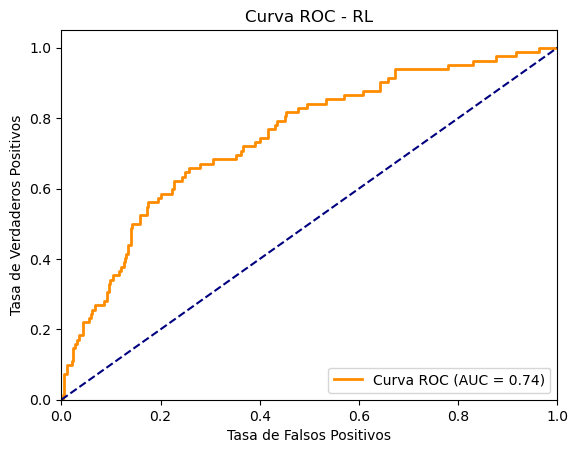

In [18]:
#PASO 4.4: Curva ROC y valor AUC
y_prob = regresion_logistica.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC - RL')
plt.legend(loc="lower right")
plt.show()

# 2 - Máquinas de Vectores de Soporte (SVM)

Las SVM son modelos de clasificación que pueden ser utilizados tanto en clasificación binaria como multiclase. Puedes usar la función SVC o LinearSVC de scikit-learn para implementar SVM en Python.

In [19]:
#PASO 1: Creamos el modelo
svm = SVC(kernel="linear")

In [20]:
#PASO 2: Entrenamos el modelo - conjunto de prueba
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [21]:
#PASO 3: Realizar predicciones - conjutno prueba
svm_prediccion = svm.predict(X_test)

In [22]:
#PASO 4: Validación del modelo
#PASO 4.1: Accuracy
accuracy_svm = accuracy_score(y_test, svm_prediccion)
print("El accuracy del modelo con SVM es de: {:.2f}%".format(accuracy_svm * 100))

lista_accuracy.append(accuracy_svm)

El accuracy del modelo con SVM es de: 77.87%


In [23]:
#PASO 4.2: Matriz de confusión 
matriz_svm = confusion_matrix(y_test, svm_prediccion)
print(matriz_svm)

[[530 129]
 [ 35  47]]


In [24]:
#PASO 4.3: Sensibilidad y especificidad
sensibilidad = matriz_svm[1, 1] / (matriz_svm[1, 1] + matriz_svm[1, 0])
especificidad = matriz_svm[0, 0] / (matriz_svm[0, 0] + matriz_svm[0, 1])
print("Sensibilidad: {:.2f}".format(sensibilidad))
print("Especificidad: {:.2f}".format(especificidad))

Sensibilidad: 0.57
Especificidad: 0.80


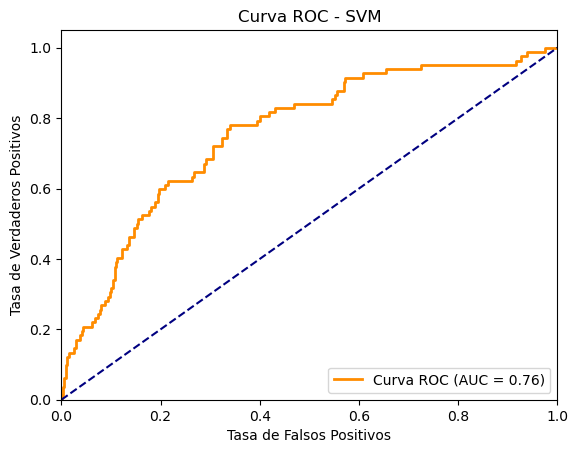

In [25]:
#PASO 4.4: Curva ROC y valor AUC
y_pred_prob = svm.decision_function(X_test) 
auc = roc_auc_score(y_test, y_pred_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - SVM")
plt.legend(loc="lower right")
plt.show()

# 3 - Árboles de Decisión 

Los árboles de decisión son modelos de clasificación que pueden ser utilizados tanto en clasificación binaria como multiclase. Puedes usar la función DecisionTreeClassifier de scikit-learn para ajustar un árbol de decisión a tus datos.

In [26]:
#PASO 1: Creamos el modelo
decision_tree = DecisionTreeClassifier()

In [27]:
#PASO 2: Entrenamos el modelo - conjunto de prueba
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
#PASO 3: Realizar predicciones - conjutno prueba
dt_pred = decision_tree.predict(X_test)

In [29]:
#PASO 4: Validación del modelo
#PASO 4.1: Accuracy
accuracy_dt = accuracy_score(y_test, dt_pred)
print("El accuracy del modelo con Decision Tree es de: {:.2f}%".format(accuracy_dt * 100))

lista_accuracy.append(accuracy_dt)

El accuracy del modelo con Decision Tree es de: 77.06%


In [30]:
#PASO 4.2: Matriz de confusión 
matriz_dt = confusion_matrix(y_test, dt_pred)
print(matriz_dt)

[[548 111]
 [ 59  23]]


In [31]:
#PASO 4.3: Sensibilidad y especificidad
sensibilidad = matriz_dt[1, 1] / (matriz_dt[1, 1] + matriz_dt[1, 0])
especificidad = matriz_dt[0, 0] / (matriz_dt[0, 0] + matriz_dt[0, 1])
print("Sensibilidad: {:.2f}".format(sensibilidad))
print("Especificidad: {:.2f}".format(especificidad))

Sensibilidad: 0.28
Especificidad: 0.83


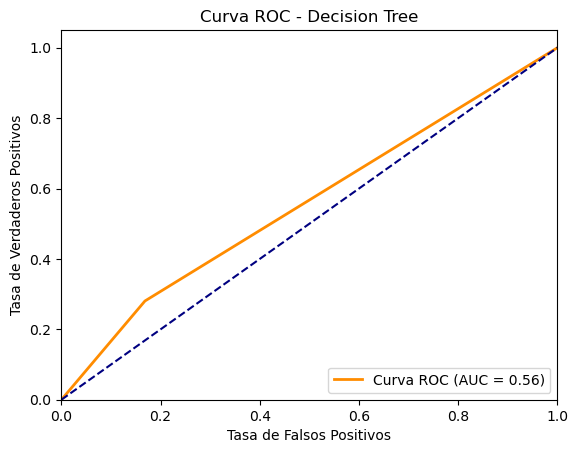

In [32]:
#PASO 4.4: Curva ROC y valor AUC
y_probs = decision_tree.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_probs)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Decision Tree")
plt.legend(loc="lower right")
plt.show()

# 4 - Random Forests

Los Random Forests son una mejora de los árboles de decisión que combinan varios árboles para mejorar la precisión y reducir la variabilidad. Puedes usar la función RandomForestClassifier de scikit-learn para ajustar un modelo de Random Forest a tus datos.

In [33]:
#PASO 1: Creamos el modelo
random_forest = RandomForestClassifier()

In [34]:
#PASO 2: Entrenamos el modelo - conjunto de prueba
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [35]:
#PASO 3: Realizar predicciones - conjutno prueba
rf_pred = random_forest.predict(X_test)

In [36]:
#PASO 4: Validación del modelo
#PASO 4.1: Accuracy
accuracy_rf = accuracy_score(y_test, rf_pred)
print("El accuracy del modelo con Random Forest es de: {:.2f}%".format(accuracy_rf * 100))

lista_accuracy.append(accuracy_rf)

El accuracy del modelo con Random Forest es de: 89.34%


In [37]:
#PASO 4.2: Matriz de confusión
matriz_rf = confusion_matrix(y_test, rf_pred)
print(matriz_rf)

[[658   1]
 [ 78   4]]


In [38]:
#PASO 4.3: Sensibilidad y especificidad
sensibilidad = matriz_rf[1, 1] / (matriz_rf[1, 1] + matriz_rf[1, 0])
especificidad = matriz_rf[0, 0] / (matriz_rf[0, 0] + matriz_rf[0, 1])
print("Sensibilidad: {:.2f}".format(sensibilidad))
print("Especificidad: {:.2f}".format(especificidad))

Sensibilidad: 0.05
Especificidad: 1.00


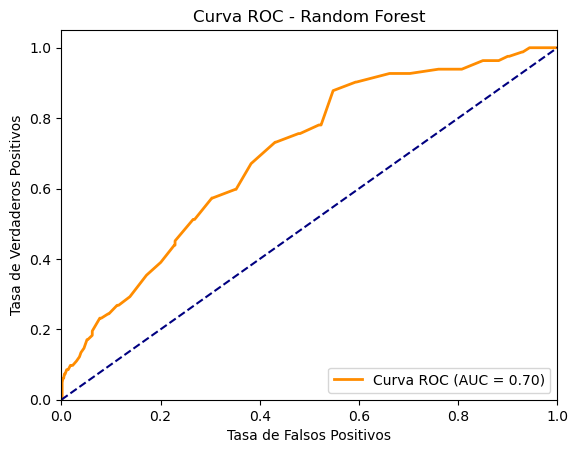

In [39]:
#PASO 4.4: Curva ROC y valor AUC
rf_probs = random_forest.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, rf_probs)
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)


plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()

# 5 - Redes Neuronales

Las redes neuronales son modelos de aprendizaje profundo que pueden ser utilizados para clasificación binaria o multiclase. Puedes utilizar bibliotecas populares de aprendizaje profundo como TensorFlow o Keras en Python para implementar redes neuronales.

In [40]:
#PASO 1: Creamos el modelo
red_neuronal = Sequential()
#red_neuronal.add(Dense(64, activation='relu', input_dim=1536))
#red_neuronal.add(Dense(32, activation='relu'))
red_neuronal.add(Dense(1, activation='sigmoid'))

red_neuronal.compile(optimizer='adam', loss='binary_crossentropy', metrics=[AUC()]) # Compilar el modelo

In [41]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [42]:
#PASO 2: Entrenamos el modelo - conjunto de prueba
red_neuronal.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
172/172 [==============================] - 3s 6ms/step - loss: 0.6769 - auc: 0.7535 - val_loss: 0.6576 - val_auc: 0.7232
Epoch 2/10
172/172 [==============================] - 1s 4ms/step - loss: 0.6484 - auc: 0.8219 - val_loss: 0.6722 - val_auc: 0.7182
Epoch 3/10
172/172 [==============================] - 1s 3ms/step - loss: 0.6250 - auc: 0.8206 - val_loss: 0.6306 - val_auc: 0.7191
Epoch 4/10
172/172 [==============================] - 1s 3ms/step - loss: 0.6054 - auc: 0.8336 - val_loss: 0.6052 - val_auc: 0.7185
Epoch 5/10
172/172 [==============================] - 1s 4ms/step - loss: 0.5893 - auc: 0.8363 - val_loss: 0.6150 - val_auc: 0.7180
Epoch 6/10
172/172 [==============================] - 1s 5ms/step - loss: 0.5756 - auc: 0.8416 - val_loss: 0.6111 - val_auc: 0.7185
Epoch 7/10
172/172 [==============================] - 1s 5ms/step - loss: 0.5637 - auc: 0.8441 - val_loss: 0.5976 - val_auc: 0.7203
Epoch 8/10
172/172 [==============================] - 1s 4ms/step - loss: 0.

In [43]:
#PASO 3: Realizar predicciones - conjutno prueba
rn_pred = red_neuronal.predict(X_test)

24/24 [==============================] - 0s 2ms/step


In [44]:
#PASO 4: Validación del modelo
#PASO 4.1: Accuracy
loss, accuracy_rn = red_neuronal.evaluate(X_test, y_test)
print("El accuracy del modelo con Red Neuronal es de: {:.2f}%".format(accuracy_rn * 100))


lista_accuracy.append(accuracy_rn)

24/24 [==============================] - 0s 3ms/step - loss: 0.5601 - auc: 0.7238
El accuracy del modelo con Red Neuronal es de: 72.38%


In [45]:
#PASO 4.2: Matriz de confusión 
rn_round_classes = np.round(rn_pred)
matriz_rn = confusion_matrix(y_test, rn_round_classes)
print(matriz_rn)

[[489 170]
 [ 34  48]]


In [46]:
#PASO 4.3: Sensibilidad y especificidad
sensibilidad = matriz_rn[1, 1] / (matriz_rn[1, 1] + matriz_rn[1, 0])
especificidad = matriz_rn[0, 0] / (matriz_rn[0, 0] + matriz_rn[0, 1])
print("Sensibilidad: {:.2f}".format(sensibilidad))
print("Especificidad: {:.2f}".format(especificidad))

Sensibilidad: 0.59
Especificidad: 0.74


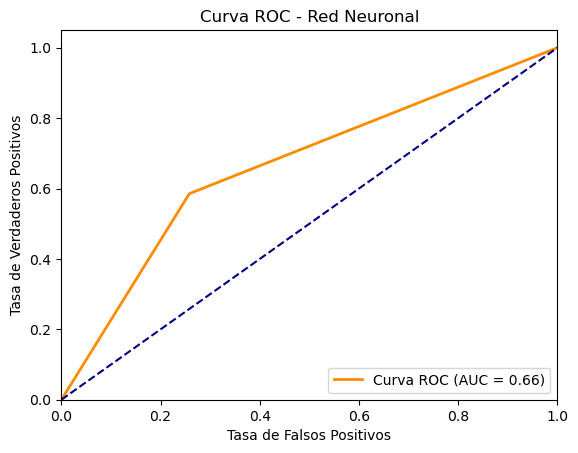

In [47]:
#PASO 4.4: Curva ROC y valor AUC
roc_auc = roc_auc_score(y_test, rn_round_classes)
fpr, tpr, thresholds = roc_curve(y_test, rn_round_classes)



plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("Tasa de Falsos Positivos")
plt.ylabel("Tasa de Verdaderos Positivos")
plt.title("Curva ROC - Red Neuronal")
plt.legend(loc="lower right")
plt.show()

In [48]:
print(lista_accuracy)

[0.757085020242915, 0.7786774628879892, 0.7705802968960864, 0.893387314439946, 0.7237961888313293]


# DE QUE TRATAN LOS CLUSTERS??

In [8]:
def palabras_por_cluster(cluster, numero):
    lista_cluster = []
    for index,row in cluster.iterrows():
        lista_cluster.append(cluster['top10'][index])
        
    for lista in range (len(lista_cluster)):
        elemento = lista_cluster[lista]
        elemento = elemento.replace(' ', '')
        elemento = elemento.replace('[', '')
        elemento = elemento.replace(']', '')
        elemento = elemento.replace("'", '')
        lista_cluster[lista] = elemento
    
    #Cogemos todas las palabras
    todas_palabras = []
    for lista in range(len(lista_cluster)):
        for palabra in lista_cluster[lista].split(','):
            todas_palabras.append(palabra)

    from collections import Counter
    frecuencia = Counter(todas_palabras)
    top10 = frecuencia.most_common(20)

    print("Las 10 palabras más comunes del cluster", numero,  "son: " )
    for palabra, veces in top10:
        print(f"{palabra}: {veces} veces")

In [9]:
#Dividimos los datos en funcion de al cluster al que pertenecen
cluster0 = datos.loc[datos['etiqueta_cluster_competitividad'] == 0]

cluster1 = datos.loc[datos['etiqueta_cluster_competitividad'] == 1]

In [10]:
palabras_por_cluster(cluster0, 0)

Las 10 palabras más comunes del cluster 0 son: 
productos: 1022 veces
calidad: 638 veces
mas: 626 veces
cookies: 517 veces
web: 393 veces
l: 307 veces
embutidos: 218 veces
empresa: 214 veces
aceite: 210 veces
sabor: 194 veces
oliva: 187 veces
informacion: 166 veces
jamones: 164 veces
jamon: 163 veces
mejor: 151 veces
pan: 140 veces
politica: 138 veces
extra: 138 veces
virgen: 133 veces
com: 126 veces


In [11]:
palabras_por_cluster(cluster1, 1)

Las 10 palabras más comunes del cluster 1 son: 
productos: 111 veces
mas: 96 veces
calidad: 76 veces
cookies: 58 veces
web: 28 veces
informacion: 23 veces
grupo: 21 veces
empresa: 20 veces
politica: 18 veces
pan: 16 veces
sitio: 15 veces
l: 15 veces
sabor: 14 veces
carne: 14 veces
food: 12 veces
producto: 11 veces
embutidos: 11 veces
alimentacion: 10 veces
produccion: 10 veces
dia: 10 veces
